In [1]:
from pathlib import Path

import re

import pandas as pd
import numpy as np

import biopsykit as bp
import biopsykit.saliva as saliva
from biopsykit.protocols import Stroop

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
sns.set(style='ticks')

## Stroop

Create a Stroop object by default parameter:
* *Phases*: Baseline, Stroop, Postline
* *Phase duration*: 10x60s,10x60s,10x60s

If you want to create a Stroop object with other parameters, you can pass this to the constructor `Stroop()`

In [3]:
stroop = Stroop()
stroop

Stroop
        Phases: ['Baseline', 'Stroop', 'Postline']
        Phase Durations: [600, 600, 600]
        

### ECG Results 

#### Load Data 

#### Subjects Conditions 

In [8]:
dict_condition = bp.io.load_subject_condition_list("D:/Victoria/09- Studium/Master/DiPsyLab/condition_list.csv")
dict_condition

{'IG': ['VP01', 'VP02', 'VP11', 'VP15', 'VP16', 'VP17', 'VP21'], 'KG': ['VP05', 'VP06', 'VP07', 'VP09', 'VP13', 'VP20', 'VP22']}

#### HR Phase Dict 

`dict_phase`: Dictionary with Heart Rate data per Stroop Phase
* keys = Phase names
* values = Heart Rate data (pandas DataFrame)

In [6]:
# Load Excel file with all sheets
dict_phase = pd.read_excel(r'D:/Victoria/09- Studium/Master/DiPsyLab/dict_phase.xlsx',sheet_name=None,index_col = 0)

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:xlabel='Time [s] ', ylabel='$\\Delta$Mean HR [bpm]'>)

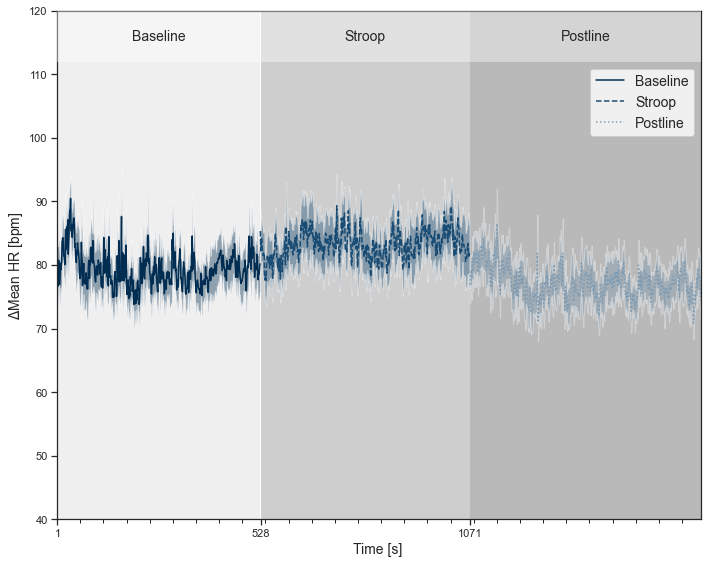

In [11]:
stroop.hr_ensemble_plot(data=dict_phase,figsize=(10,8),ylims=(40,120))

In [9]:
#Split 'dict_phase' into groups
dict_groups = stroop.split_groups(dict_phase,dict_condition)

['IG']
['IG', 'KG']


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:xlabel='Time [s] ', ylabel='$\\Delta$Mean HR [bpm]'>)

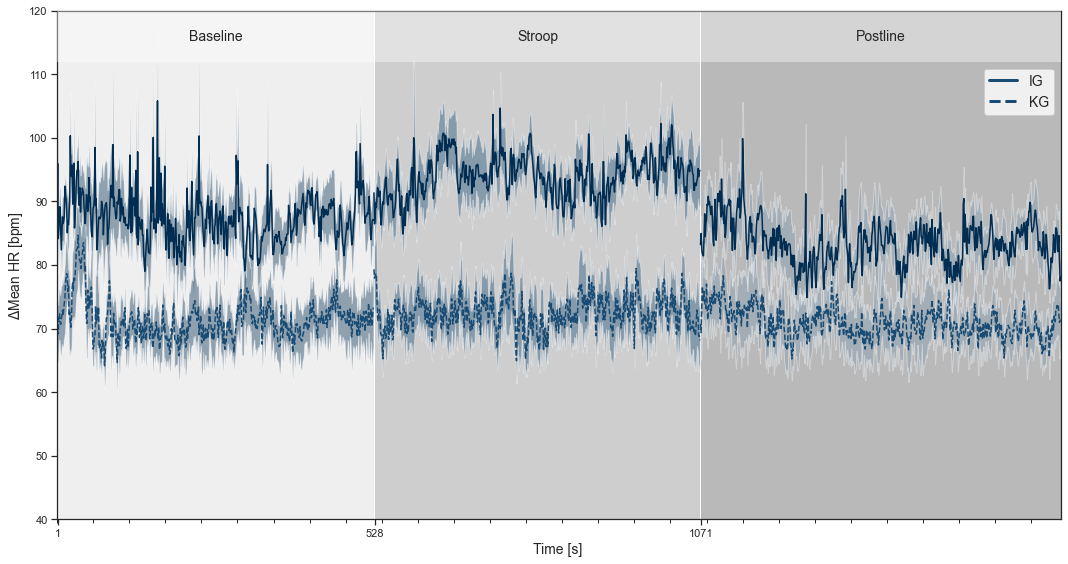

In [12]:
stroop.hr_ensemble_plot(data=dict_groups,figsize=(15,8),ylims=(40,120),is_group_dict=True)

In [18]:
folder = 'D:/Victoria/09- Studium/Master/DiPsyLab/social evaluated Stroop-Test - inkongruent/data/test/'
dict_stroop = stroop.load_stroop_test_data(folder=folder)

c:\users\vmueller\biopsykit\biopsykit\protocols\stroop.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['phase'] = stroop_n


In [22]:
dict_stroop

{'VP13': {'stroop_results':      phase            propcorrect                    meanRT  \
  0  Stroop1  0,8717948717948718063  1036,0588235294117112062   
  1  Stroop2                      1   794,9487179487178991621   
  2  Stroop3  0,9487179487179486781   630,6756756756756203686   
  
     propcorrect_congruent propcorrect_incongruent    propcorrect_control  \
  0  0,9166666666666666297   0,8461538461538461453  0,8571428571428570953   
  1                      1                       1                      1   
  2  0,9230769230769231282   0,9285714285714286031                      1   
  
        meanRTcorr_congruent    meanRTcorr_incongruent        meanRTcorr_control  
  0  936,1818181818181301423  1035,8181818181817561708  1127,8333333333332575421  
  1  656,7999999999999545253   798,7142857142856655628   883,5333333333333030168  
  2                    714,5                       652                    523,75  ,
  'stroop_raw':      latency  correct    phase
  0       1128      

In [25]:
condition_dict = {'IG': ['VP13'], 'KG': ['VP21']}

In [30]:
for condition in condition_dict.keys():
    for key, df in dict_stroop.items():
        print(condition,key,df)


IG VP13 {'stroop_results':      phase            propcorrect                    meanRT  \
0  Stroop1  0,8717948717948718063  1036,0588235294117112062   
1  Stroop2                      1   794,9487179487178991621   
2  Stroop3  0,9487179487179486781   630,6756756756756203686   

   propcorrect_congruent propcorrect_incongruent    propcorrect_control  \
0  0,9166666666666666297   0,8461538461538461453  0,8571428571428570953   
1                      1                       1                      1   
2  0,9230769230769231282   0,9285714285714286031                      1   

      meanRTcorr_congruent    meanRTcorr_incongruent        meanRTcorr_control  
0  936,1818181818181301423  1035,8181818181817561708  1127,8333333333332575421  
1  656,7999999999999545253   798,7142857142856655628   883,5333333333333030168  
2                    714,5                       652                    523,75  , 'stroop_raw':      latency  correct    phase
0       1128        0  Stroop1
1       2840      

In [28]:
{condition: {key: df[condition_dict[condition]] for key, df in dict_stroop.items()} for condition
        in condition_dict.keys()}

TypeError: unhashable type: 'list'

In [20]:
dict_groups

{'IG': {'Baseline':            VP01       VP02       VP11       VP15       VP16       VP17  \
  0     78.367347  98.461538  80.842105  83.934426  89.302326  97.215190   
  1    135.929204  96.603774  81.702128  83.478261  82.580645  96.603774   
  2     56.058394  94.233129  82.580645  87.272727  76.800000  97.215190   
  3     71.441860  90.887574  85.333333  88.275862  76.800000  97.215190   
  4     77.575758  89.302326  86.779661  89.302326  87.771429  99.096774   
  ..          ...        ...        ...        ...        ...        ...   
  522   61.440000  96.603774  89.302326  78.367347  82.580645  94.233129   
  523   63.209877  95.403727  88.275862  78.769231  86.292135  97.215190   
  524   67.074236  93.658537  87.771429  80.000000  90.887574  94.233129   
  525   65.084746  93.658537  88.786127  82.139037  86.779661  96.603774   
  526   65.641026  91.428571  89.302326  81.702128  86.779661  96.603774   
  
            VP21  
  0    82.491944  
  1    94.814815  
  2    94.

In [14]:
df_stroop = stroop.get_stroop_dataframe(data=dict_stroop)
df_stroop

Subjects:   0%|          | 0/2 [00:00<?, ?it/s]

c:\users\vmueller\biopsykit\biopsykit\protocols\stroop.py:387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['subject'] = subject_id


propcorrect       meanRT
subject phase                            
VP13    Stroop1     0.871795  1036.058824
        Stroop2     1.000000   794.948718
        Stroop3     0.948718   630.675676
VP21    Stroop1     0.897436   525.342857
        Stroop2     0.820513   513.312500
        Stroop3     0.794872   490.741935

,phase,propcorrect_mean,meanRT_mean,propcorrect_std,meanRT_std
0,Stroop1,88.461538,780.700840,1.813094,361.130723
1,Stroop2,91.025641,654.130609,12.691660,199.146880
2,Stroop3,87.179487,560.708806,10.878566,98.948097


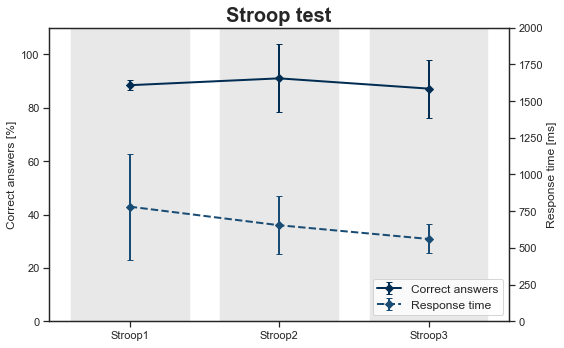

In [16]:
df_stroop_mean = stroop.plot_stroop_mean(data=df_stroop)
df_stroop_mean

In [ ]:
df_stroop_mean = stroop.plot_stroop_mean(data=dict_stroop)

In [ ]:
df_stroop_mean